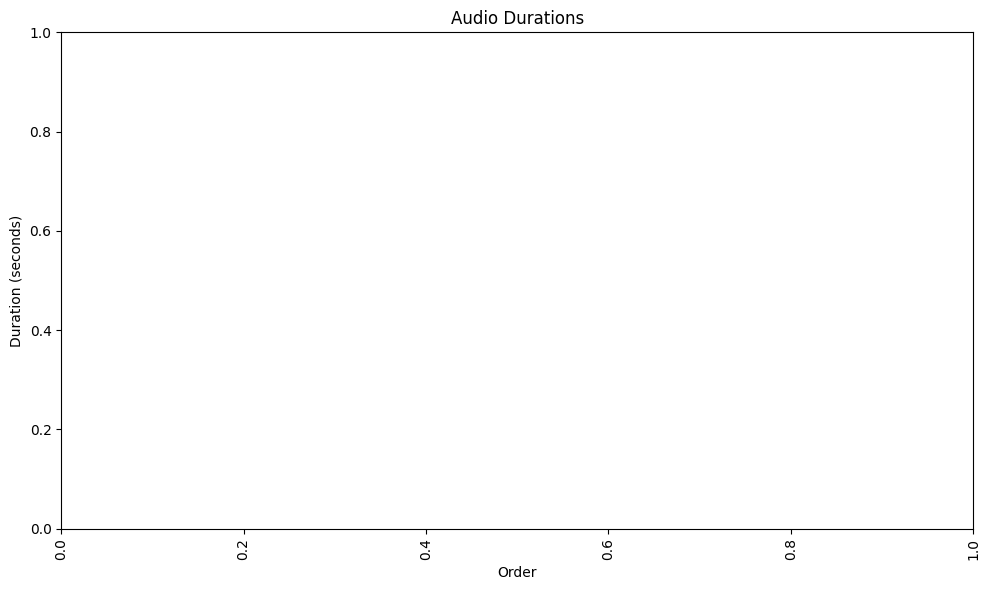

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import wave

stim_folder = "/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/Long_Range_Agreement/Long_Range_Pilot/Stimuli"

# List all .wav files in the specified folder
wav_files = [f for f in os.listdir(stim_folder) if f.endswith('.wav')]
# Store durations of .wav files
durations = []

# Calculate and store the duration of each .wav file
for wav_file in wav_files:
    with wave.open(os.path.join(stim_folder, wav_file), 'r') as wav:
        frames = wav.getnframes()
        rate = wav.getframerate()
        duration = frames / float(rate)
        durations.append((wav_file, duration))

# Sort durations by the duration value
durations.sort(key=lambda x: x[1])

# Create a DataFrame for visualization
df = pd.DataFrame(durations, columns=['File', 'Duration'])

# Plot the durations in order
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(len(durations))), y='Duration', data=df)
plt.xticks(rotation=90)
plt.title('Audio Durations')
plt.xlabel('Order')
plt.ylabel('Duration (seconds)')
plt.tight_layout()
plt.show()

In [ ]:
subject_path = "home/avalazem/Desktop/Work/Single_Word_Processing_Stage/Long_Range_Agreement/Long_Range_Pilot/Stimuli/subject_01"

In [3]:
import pandas as pd
import os

# Define the path to the CSV file
csv_file_path = "/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/Long_Range_Agreement/Long_Range_Pilot/Stimuli/subject_01/sub_01_run_1/sub_01_run_1.csv"

# Check if the file exists
if os.path.exists(csv_file_path):
    # Read the CSV file
    df_check = pd.read_csv(csv_file_path)

    # Check if 'sentence' column exists
    if 'sentence' in df_check.columns:
        # Find duplicate sentences
        duplicates = df_check[df_check.duplicated(subset=['sentence'], keep=False)]

        if not duplicates.empty:
            print(f"Duplicate sentences found in {os.path.basename(csv_file_path)}:")
            # Print only the duplicated sentences and their counts
            print(duplicates['sentence'].value_counts())
        else:
            print(f"No duplicate sentences found in {os.path.basename(csv_file_path)}.")
    else:
        print(f"Error: 'sentence' column not found in {os.path.basename(csv_file_path)}.")
else:
    print(f"Error: File not found at {csv_file_path}")

No duplicate sentences found in sub_01_run_1.csv.


In [7]:
import pandas as pd
import os

# Base path for subject 01 stimuli
base_path = "/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/Long_Range_Agreement/Long_Range_Pilot/Stimuli/subject_01"
all_dfs = []
found_files = []
missing_files = []

# Loop through run numbers 1 to 6
for run_num in range(1, 7):
    run_folder = f"sub_01_run_{run_num}"
    csv_filename = f"sub_01_run_{run_num}.csv"
    csv_file_path = os.path.join(base_path, run_folder, csv_filename)

    # Check if the file exists
    if os.path.exists(csv_file_path):
        try:
            df_run = pd.read_csv(csv_file_path)
            # Check if 'sentence' column exists before appending
            if 'sentence' in df_run.columns:
                all_dfs.append(df_run)
                found_files.append(csv_file_path)
            else:
                print(f"Warning: 'sentence' column not found in {csv_file_path}. Skipping this file.")
        except Exception as e:
            print(f"Error reading {csv_file_path}: {e}")
    else:
        missing_files.append(csv_file_path)

# Report missing files, if any
if missing_files:
    print("Missing files:")
    for f in missing_files:
        print(f)

# Proceed only if some files were found and read
if all_dfs:
    # Concatenate all dataframes
    combined_df = pd.concat(all_dfs, ignore_index=True)

    # Check for duplicates in the 'sentence' column across all runs
    duplicates_across_runs = combined_df[combined_df.duplicated(subset=['sentence'], keep=False)]

    if not duplicates_across_runs.empty:
        print("\nDuplicate sentences found across the following files:")
        for f in found_files:
            print(f)
        print("\nDuplicate sentences and their counts:")
        print(duplicates_across_runs['sentence'].value_counts())
    else:
        print("\nNo duplicate sentences found across the checked files:")
        for f in found_files:
            print(f)
else:
    print("\nNo CSV files with a 'sentence' column were found or read successfully. Cannot check for duplicates.")


No duplicate sentences found across the checked files:
/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/Long_Range_Agreement/Long_Range_Pilot/Stimuli/subject_01/sub_01_run_1/sub_01_run_1.csv
/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/Long_Range_Agreement/Long_Range_Pilot/Stimuli/subject_01/sub_01_run_2/sub_01_run_2.csv
/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/Long_Range_Agreement/Long_Range_Pilot/Stimuli/subject_01/sub_01_run_3/sub_01_run_3.csv
/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/Long_Range_Agreement/Long_Range_Pilot/Stimuli/subject_01/sub_01_run_4/sub_01_run_4.csv
/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/Long_Range_Agreement/Long_Range_Pilot/Stimuli/subject_01/sub_01_run_5/sub_01_run_5.csv
/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/Long_Range_Agreement/Long_Range_Pilot/Stimuli/subject_01/sub_01_run_6/sub_01_run_6.csv
